#### [실습] auto-mpg 데이터 실습🚗
1. mpg : 연비
2. cylinders : 실린더 갯수
3. displacement : 배기량
4. horsepower : 마력
5. weught : 무게
6. acceleration : 엔진이 초당 얻을 수 있는 가속력
7. model year : 출시연도
8. origin : 제조 장소 (1 : 미국 USA, 2 : 유럽 EU, 3 : 일본 JPN)
9. car name : 자동차 이름

In [732]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [733]:
# 데이터 불러오기
data = pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [734]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [735]:
# horsepower의 고유값 출력
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [736]:
# horsepower의 '?' 값 제거
data.drop(data[data['horsepower'] == '?'].index, inplace=True)
data.horsepower = data.horsepower.astype('int64')
data.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [737]:
data.drop(['car name'],axis = 1, inplace=True)
data.origin.astype('int64')
data = data.reset_index(drop=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


In [738]:
# 상관계수
corr_df = data.corr()
corr_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [739]:
s = corr_df.unstack()
s

mpg     mpg             1.000000
        cylinders      -0.777618
        displacement   -0.805127
        horsepower     -0.778427
        weight         -0.832244
                          ...   
origin  horsepower     -0.455171
        weight         -0.585005
        acceleration    0.212746
        model year      0.181528
        origin          1.000000
Length: 64, dtype: float64

In [740]:
# 상관계수가 높은 순부터 정렬 ( 자기 자신과의 관계인 1 제외 )
corr_DF = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_DF.style.background_gradient(cmap = 'Blues')

,,corr
displacement,cylinders,0.950823
cylinders,displacement,0.950823
displacement,weight,0.932994
weight,displacement,0.932994
cylinders,weight,0.897527
weight,cylinders,0.897527
horsepower,displacement,0.897257
displacement,horsepower,0.897257
weight,horsepower,0.864538
horsepower,weight,0.864538


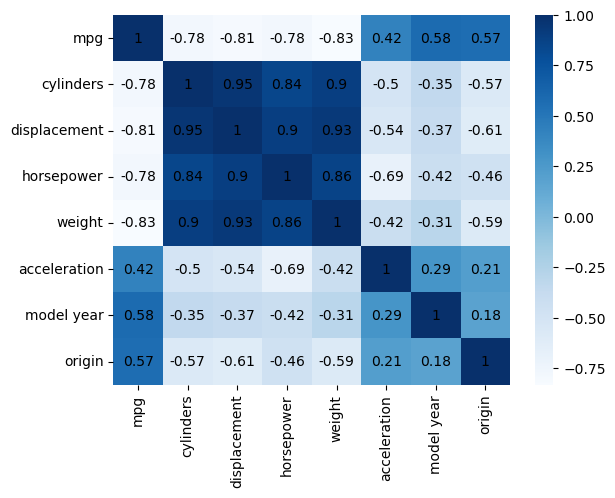

In [741]:
import seaborn as sns

ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='black'), cmap='Blues')
plt.show()

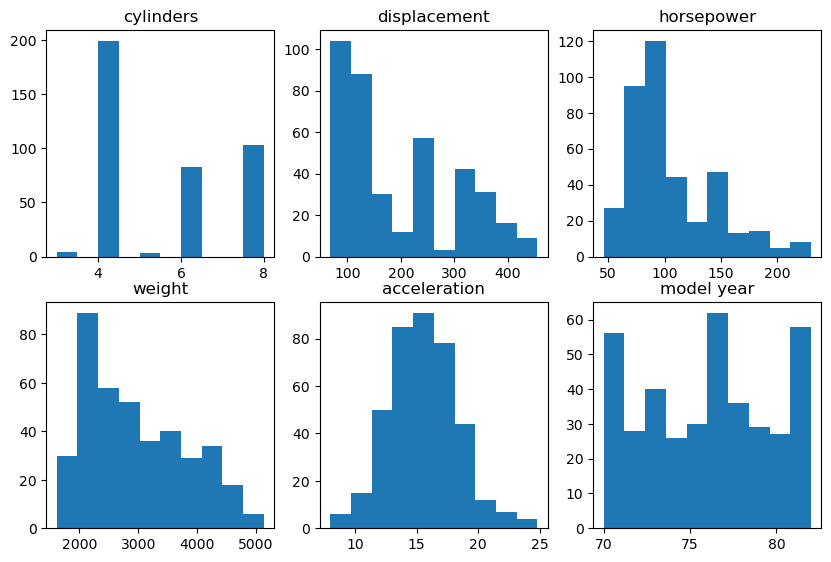

In [742]:
# 히스토그램
plt.figure(figsize=(10,10))

for i in range(1, len(data.columns)-1):
    plt.subplot(3, 3, i)
    plt.hist(data[data.columns[i]])
    plt.title(data.columns[i])

In [743]:
# 정규화
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(data.iloc[:, 1:7])

DF_std = pd.DataFrame(df_std, columns=data.columns[1:7])
DF_std

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315
...,...,...,...,...,...,...
387,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410
388,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410
389,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410
390,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410


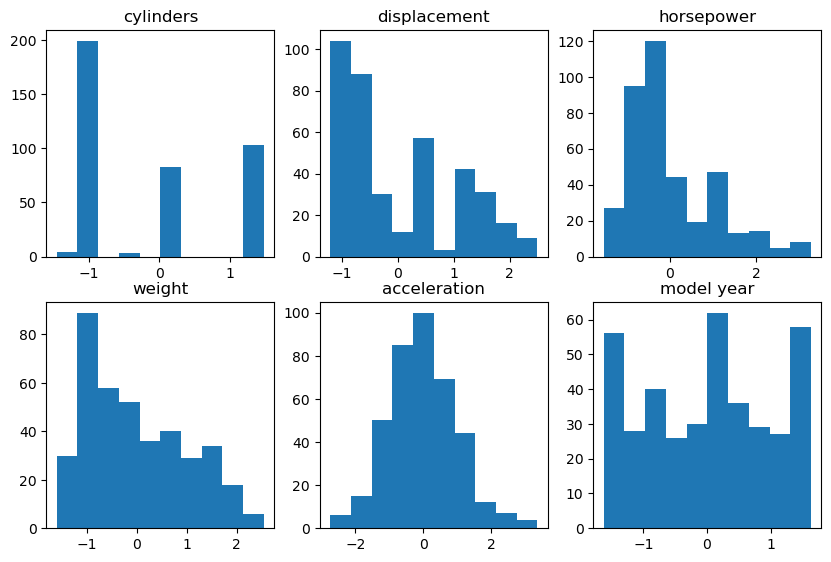

In [744]:
plt.figure(figsize=(10, 10))

for i in range(len(DF_std.columns)):
    plt.subplot(3, 3, i+1)
    plt.hist(DF_std[DF_std.columns[i]])
    plt.title(DF_std.columns[i])

In [745]:
# 정규화 RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = scaler.fit_transform(data.iloc[:, 1:7])

DF_robust = pd.DataFrame(df_robust, columns=data.columns[1:7])
DF_robust

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.0,0.913616,0.715686,0.504138,-1.076923,-1.0
1,1.0,1.165447,1.401961,0.640158,-1.230769,-1.0
2,1.0,0.978038,1.107843,0.455200,-1.384615,-1.0
3,1.0,0.896047,1.107843,0.453041,-1.076923,-1.0
4,1.0,0.884334,0.911765,0.464556,-1.538462,-1.0
...,...,...,...,...,...,...
387,0.0,-0.064422,-0.147059,-0.009716,0.030769,1.0
388,0.0,-0.316252,-0.813725,-0.484707,2.800000,1.0
389,0.0,-0.093704,-0.186275,-0.365959,-1.200000,1.0
390,0.0,-0.181552,-0.284314,-0.128463,0.953846,1.0


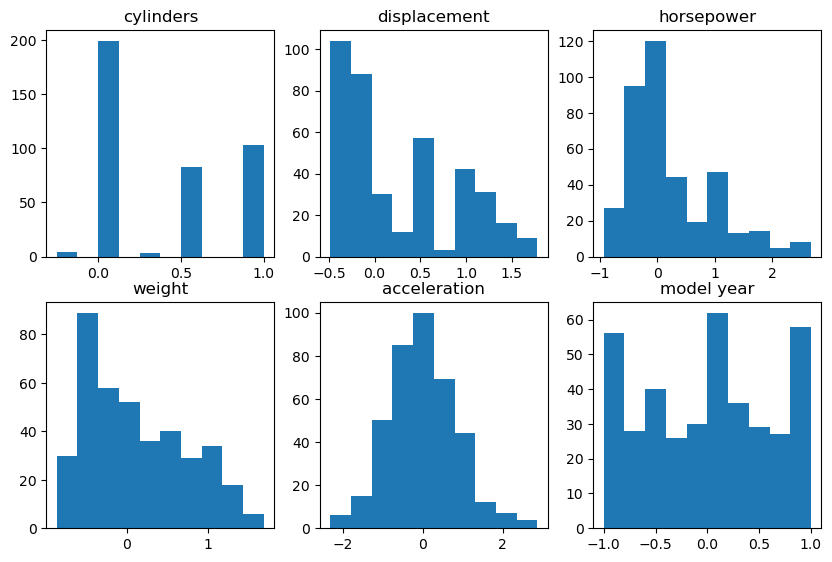

In [746]:
plt.figure(figsize=(10, 10))

for i in range(len(DF_robust.columns)):
    plt.subplot(3, 3, i+1)
    plt.hist(DF_robust[DF_robust.columns[i]])
    plt.title(DF_robust.columns[i])

In [747]:
# origin 인코딩
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

In [748]:
label = data.origin

In [749]:
label.values.reshape(-1, 1).shape

(392, 1)

In [750]:
ohe.fit(label.values.reshape(-1, 1))

OneHotEncoder(sparse=False)

In [751]:
one_hot = ohe.transform(label.values.reshape(-1, 1))
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [752]:
ohe_df = pd.DataFrame(one_hot, columns = ['USA', 'EU', "JPN"])
ohe_df

,USA,EU,JPN
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
387,1.0,0.0,0.0
388,0.0,1.0,0.0
389,1.0,0.0,0.0
390,1.0,0.0,0.0


In [753]:
dataset = pd.concat([data['mpg'], DF_robust, ohe_df], axis=1)
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,EU,JPN
0,18.0,1.0,0.913616,0.715686,0.504138,-1.076923,-1.0,1.0,0.0,0.0
1,15.0,1.0,1.165447,1.401961,0.640158,-1.230769,-1.0,1.0,0.0,0.0
2,18.0,1.0,0.978038,1.107843,0.455200,-1.384615,-1.0,1.0,0.0,0.0
3,16.0,1.0,0.896047,1.107843,0.453041,-1.076923,-1.0,1.0,0.0,0.0
4,17.0,1.0,0.884334,0.911765,0.464556,-1.538462,-1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,0.0,-0.064422,-0.147059,-0.009716,0.030769,1.0,1.0,0.0,0.0
388,44.0,0.0,-0.316252,-0.813725,-0.484707,2.800000,1.0,0.0,1.0,0.0
389,32.0,0.0,-0.093704,-0.186275,-0.365959,-1.200000,1.0,1.0,0.0,0.0
390,28.0,0.0,-0.181552,-0.284314,-0.128463,0.953846,1.0,1.0,0.0,0.0


##### 1. 회귀 기반 모델링 - 회귀 (예측)

LinearRegression

In [754]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [755]:
y = dataset.pop('mpg')
X = dataset

In [756]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [757]:
len(X_train), len(y_train), len(X_test), len(y_test)

(274, 274, 118, 118)

In [758]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [759]:
y_pred = lr.predict(X_test)

In [760]:
mean_squared_error(y_pred, y_test), r2_score(y_test, y_pred)

(11.686647647209726, 0.8242172817490034)

PolynomialFeatures

In [761]:
from sklearn.preprocessing import PolynomialFeatures

In [762]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [763]:
poly_reg = LinearRegression()

In [764]:
poly_reg.fit(X_train2, y_train)

LinearRegression()

In [765]:
y_pred2 = poly_reg.predict(X_test2)

In [766]:
mean_squared_error(y_pred2, y_test), r2_score(y_test, y_pred2)

(140.88554687500002, -1.1191059352147557)

Ridge

In [767]:
from sklearn.linear_model import Ridge

In [768]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [769]:
y_pred3 = ridge.predict(X_test)

In [770]:
mean_squared_error(y_pred3, y_test), r2_score(y_test, y_pred3)

(12.184234074359011, 0.816732920333351)

Lasso

In [771]:
from sklearn.linear_model import Lasso

In [772]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [773]:
y_pred4 = lasso.predict(X_test)

In [774]:
mean_squared_error(y_pred4, y_test), r2_score(y_test, y_pred4)

(11.72701463903556, 0.823610108523202)

##### 2. 회귀 기반 모델링 - 분류

LogisticRegression

In [775]:
from sklearn.linear_model import LogisticRegression

In [776]:
dataset2 = pd.concat([DF_robust, data.origin], axis = 1)

In [777]:
y = dataset2.pop('origin')
X = dataset2

In [778]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [779]:
lr_clf = LogisticRegression()

In [780]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [781]:
lr_preds = lr_clf.predict(X_test)

In [782]:
from sklearn.metrics import accuracy_score

In [783]:
accuracy_score(y_test, lr_preds)

0.7966101694915254

In [786]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf_ = LogisticRegression(solver=solver, max_iter=600)
    lr_clf_.fit(X_train, y_train)
    lr_preds_ = lr_clf_.predict(X_test)

    print('solver:{0}, accuracy: {1:.3f}'.format(solver, accuracy_score(y_test, lr_preds_)))

solver:lbfgs, accuracy: 0.797
solver:liblinear, accuracy: 0.797
solver:newton-cg, accuracy: 0.797
solver:sag, accuracy: 0.797
solver:saga, accuracy: 0.797
